In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading data set as data frame

In [ ]:
df=pd.read_csv('/content/drive/My Drive/dataset.csv')
df

,Participant code,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,Levodopa equivalent (mg/day),Clonazepam (mg/day),Overview of motor examination: Hoehn & Yahr scale (-),Overview of motor examination: UPDRS III total (-),18. Speech,19. Facial Expression,20. Tremor at Rest - head,20. Tremor at Rest - RUE,20. Tremor at Rest - LUE,20. Tremor at Rest - RLE,20. Tremor at Rest - LLE,21. Action or Postural Tremor - RUE,21. Action or Postural Tremor - LUE,22. Rigidity - neck,22. Rigidity - RUE,22. Rigidity - LUE,22. Rigidity - RLE,22. Rigidity - LLE,23.Finger Taps - RUE,23.Finger Taps - LUE,24. Hand Movements - RUE,24. Hand Movements - LUE,25. Rapid Alternating Movements - RUE,25. Rapid Alternating Movements - LUE,26. Leg Agility - RLE,26. Leg Agility - LLE,27. Arising from Chair,28. Posture,29. Gait,30. Postural Stability,31. Body Bradykinesia and Hypokinesia,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,PD01,58,F,No,56,2,No,No,No,No,0,0.0,1.5,8,0,1,0,0,2,0,2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1.564,354,6.05,146,264,58.65,31.38,-2.101,-22.47,4.5,21.14,167,1.564,333,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,PD02,68,F,No,67,1,No,No,No,No,0,0.0,2.5,22,1,1,0,0,0,0,0,1,1,1,0,1,1,2,1,2,0,1,1,2,1,2,0,1,0,1,1,1.564,340,27.52,173,253,48.26,22.38,-1.745,-24.59,7.0,15.28,163,1.569,285,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,PD03,68,M,No,67,1,No,No,No,No,0,0.0,2,19,0,2,0,0,0,0,0,0,0,2,0,0,2,2,1,1,0,1,0,0,1,2,0,3,0,0,2,1.550,211,11.97,377,322,47.54,38.12,2.657,-16.89,3.0,20.76,372,1.550,247,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,PD04,75,M,No,73,2,No,No,No,No,0,0.0,2,24,0,2,0,1,0,1,0,1,1,1,1,1,1,1,1,1,2,2,1,2,1,0,0,1,1,0,1,1.519,140,-2.49,360,663,13.72,44.88,-0.934,-25.54,1.0,18.71,119,1.539,112,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,PD05,61,M,Yes,60,0.7,No,No,No,No,0,0.0,2.5,54,1,3,3,2,1,1,0,1,2,3,3,3,1,1,3,4,2,4,2,3,1,3,1,2,1,1,2,1.543,269,6.72,211,328,42.90,47.12,-0.973,-22.61,5.0,16.26,78,1.560,230,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,HC46,69,M,-,-,-,No,No,No,No,0,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.564,265,3.58,198,365,40.25,26.88,-1.872,-28.04,6.5,10.24,158,1.554,254,8.43,264,380,36.36,26.88,0.023,-23.12,3.0,15.41,177
126,HC47,68,M,-,-,-,No,No,No,No,0,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.547,291,6.31,183,359,39.59,31.37,-1.517,-22.87,5.0,13.46,224,1.569,300,4.09,177,359,47.06,22.37,-0.117,-18.67,5.0,16.94,138
127,HC48,53,M,-,-,-,No,No,No,No,0,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.540,298,-13.66,177,283,53.01,50.50,-1.111,-22.91,4.5,19.11,251,1.537,246,5.09,223,391,37.74,40.37,0.411,-15.56,3.0,19.51,156
128,H

# Data Preparation

In [ ]:
#Removing the nnumber part of the participant code:

df.rename(columns={' Participant  code ':'target'},inplace=True)
df[df.columns[0]]=df[df.columns[0]].map(lambda n: n[:2])

In [ ]:
df

,target,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,Levodopa equivalent (mg/day),Clonazepam (mg/day),Overview of motor examination: Hoehn & Yahr scale (-),Overview of motor examination: UPDRS III total (-),18. Speech,19. Facial Expression,20. Tremor at Rest - head,20. Tremor at Rest - RUE,20. Tremor at Rest - LUE,20. Tremor at Rest - RLE,20. Tremor at Rest - LLE,21. Action or Postural Tremor - RUE,21. Action or Postural Tremor - LUE,22. Rigidity - neck,22. Rigidity - RUE,22. Rigidity - LUE,22. Rigidity - RLE,22. Rigidity - LLE,23.Finger Taps - RUE,23.Finger Taps - LUE,24. Hand Movements - RUE,24. Hand Movements - LUE,25. Rapid Alternating Movements - RUE,25. Rapid Alternating Movements - LUE,26. Leg Agility - RLE,26. Leg Agility - LLE,27. Arising from Chair,28. Posture,29. Gait,30. Postural Stability,31. Body Bradykinesia and Hypokinesia,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,PD,58,F,No,56,2,No,No,No,No,0,0.0,1.5,8,0,1,0,0,2,0,2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1.564,354,6.05,146,264,58.65,31.38,-2.101,-22.47,4.5,21.14,167,1.564,333,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,PD,68,F,No,67,1,No,No,No,No,0,0.0,2.5,22,1,1,0,0,0,0,0,1,1,1,0,1,1,2,1,2,0,1,1,2,1,2,0,1,0,1,1,1.564,340,27.52,173,253,48.26,22.38,-1.745,-24.59,7.0,15.28,163,1.569,285,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,PD,68,M,No,67,1,No,No,No,No,0,0.0,2,19,0,2,0,0,0,0,0,0,0,2,0,0,2,2,1,1,0,1,0,0,1,2,0,3,0,0,2,1.550,211,11.97,377,322,47.54,38.12,2.657,-16.89,3.0,20.76,372,1.550,247,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,PD,75,M,No,73,2,No,No,No,No,0,0.0,2,24,0,2,0,1,0,1,0,1,1,1,1,1,1,1,1,1,2,2,1,2,1,0,0,1,1,0,1,1.519,140,-2.49,360,663,13.72,44.88,-0.934,-25.54,1.0,18.71,119,1.539,112,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,PD,61,M,Yes,60,0.7,No,No,No,No,0,0.0,2.5,54,1,3,3,2,1,1,0,1,2,3,3,3,1,1,3,4,2,4,2,3,1,3,1,2,1,1,2,1.543,269,6.72,211,328,42.90,47.12,-0.973,-22.61,5.0,16.26,78,1.560,230,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,HC,69,M,-,-,-,No,No,No,No,0,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.564,265,3.58,198,365,40.25,26.88,-1.872,-28.04,6.5,10.24,158,1.554,254,8.43,264,380,36.36,26.88,0.023,-23.12,3.0,15.41,177
126,HC,68,M,-,-,-,No,No,No,No,0,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.547,291,6.31,183,359,39.59,31.37,-1.517,-22.87,5.0,13.46,224,1.569,300,4.09,177,359,47.06,22.37,-0.117,-18.67,5.0,16.94,138
127,HC,53,M,-,-,-,No,No,No,No,0,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1.540,298,-13.66,177,283,53.01,50.50,-1.111,-22.91,4.5,19.11,251,1.537,246,5.09,223,391,37.74,40.37,0.411,-15.56,3.0,19.51,156
128,HC,44,M,-,-,-,No,No,No,No,0

In [ ]:
df[df.columns[0]].value_counts()

RB    50
HC    50
PD    30
Name: target, dtype: int64

In [ ]:
a=list(df.columns)
#df.columns
a

['target',
 ' Age  (years) ',
 'Gender',
 ' Positive  history  of  Parkinson  disease  in  family ',
 ' Age  of  disease  onset  (years) ',
 ' Duration  of  disease  from  first  symptoms  (years) ',
 ' Antidepressant  therapy ',
 ' Antiparkinsonian  medication ',
 ' Antipsychotic  medication ',
 ' Benzodiazepine  medication ',
 ' Levodopa  equivalent  (mg/day) ',
 ' Clonazepam  (mg/day) ',
 ' Overview  of  motor  examination:  Hoehn  &  Yahr  scale  (-) ',
 ' Overview  of  motor  examination:  UPDRS  III  total  (-) ',
 ' 18.  Speech ',
 ' 19.  Facial  Expression ',
 ' 20.  Tremor  at  Rest  -  head ',
 ' 20.  Tremor  at  Rest  -  RUE ',
 ' 20.  Tremor  at  Rest  -  LUE ',
 ' 20.  Tremor  at  Rest  -  RLE ',
 ' 20.  Tremor  at  Rest  -  LLE ',
 ' 21.  Action  or  Postural  Tremor  -  RUE ',
 ' 21.  Action  or  Postural  Tremor  -  LUE ',
 ' 22.  Rigidity  -  neck ',
 ' 22.  Rigidity  -  RUE ',
 ' 22.  Rigidity  -  LUE ',
 ' 22.  Rigidity  -  RLE ',
 ' 22.  Rigidity  -  LLE ',
 ' 23.Fi

In [ ]:
#Replacing string data to numerical data

#map={'Yes':1,'No':0};
df.replace({'Yes':1,'No':0, 'F':0, 'M':1, 'PD':0, 'RB':0, 'HC':1},inplace=True)


In [ ]:
df.head()

,target,Age (years),Gender,Positive history of Parkinson disease in family,Age of disease onset (years),Duration of disease from first symptoms (years),Antidepressant therapy,Antiparkinsonian medication,Antipsychotic medication,Benzodiazepine medication,Levodopa equivalent (mg/day),Clonazepam (mg/day),Overview of motor examination: Hoehn & Yahr scale (-),Overview of motor examination: UPDRS III total (-),18. Speech,19. Facial Expression,20. Tremor at Rest - head,20. Tremor at Rest - RUE,20. Tremor at Rest - LUE,20. Tremor at Rest - RLE,20. Tremor at Rest - LLE,21. Action or Postural Tremor - RUE,21. Action or Postural Tremor - LUE,22. Rigidity - neck,22. Rigidity - RUE,22. Rigidity - LUE,22. Rigidity - RLE,22. Rigidity - LLE,23.Finger Taps - RUE,23.Finger Taps - LUE,24. Hand Movements - RUE,24. Hand Movements - LUE,25. Rapid Alternating Movements - RUE,25. Rapid Alternating Movements - LUE,26. Leg Agility - RLE,26. Leg Agility - LLE,27. Arising from Chair,28. Posture,29. Gait,30. Postural Stability,31. Body Bradykinesia and Hypokinesia,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,0,58,0,0,56,2,0,0,0,0,0,0.0,1.5,8,0,1,0,0,2,0,2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1.564,354,6.05,146,264,58.65,31.38,-2.101,-22.47,4.5,21.14,167,1.564,333,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,0,68,0,0,67,1,0,0,0,0,0,0.0,2.5,22,1,1,0,0,0,0,0,1,1,1,0,1,1,2,1,2,0,1,1,2,1,2,0,1,0,1,1,1.564,340,27.52,173,253,48.26,22.38,-1.745,-24.59,7.0,15.28,163,1.569,285,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,0,68,1,0,67,1,0,0,0,0,0,0.0,2,19,0,2,0,0,0,0,0,0,0,2,0,0,2,2,1,1,0,1,0,0,1,2,0,3,0,0,2,1.550,211,11.97,377,322,47.54,38.12,2.657,-16.89,3.0,20.76,372,1.550,247,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,0,75,1,0,73,2,0,0,0,0,0,0.0,2,24,0,2,0,1,0,1,0,1,1,1,1,1,1,1,1,1,2,2,1,2,1,0,0,1,1,0,1,1.519,140,-2.49,360,663,13.72,44.88,-0.934,-25.54,1.0,18.71,119,1.539,112,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,0,61,1,1,60,0.7,0,0,0,0,0,0.0,2.5,54,1,3,3,2,1,1,0,1,2,3,3,3,1,1,3,4,2,4,2,3,1,3,1,2,1,1,2,1.543,269,6.72,211,328,42.90,47.12,-0.973,-22.61,5.0,16.26,78,1.560,230,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151


In [ ]:
df.columns.get_loc(" 31.  Body  Bradykinesia  and  Hypokinesia ")

40

In [ ]:
to_drop=list(df.columns[3:41])
df.drop(to_drop,1,inplace=True)

In [ ]:
df.head()

,target,Age (years),Gender,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,0,58,0,1.564,354,6.05,146,264,58.65,31.38,-2.101,-22.47,4.5,21.14,167,1.564,333,-2.82,158,318,49.01,22.37,0.588,-19.77,6.0,13.81,127
1,0,68,0,1.564,340,27.52,173,253,48.26,22.38,-1.745,-24.59,7.0,15.28,163,1.569,285,8.20,295,264,40.56,26.88,-0.825,-23.26,4.0,21.77,313
2,0,68,1,1.550,211,11.97,377,322,47.54,38.12,2.657,-16.89,3.0,20.76,372,1.550,247,4.71,280,317,48.97,22.37,-0.955,-13.29,4.0,22.52,201
3,0,75,1,1.519,140,-2.49,360,663,13.72,44.88,-0.934,-25.54,1.0,18.71,119,1.539,112,-9.09,397,800,18.69,49.37,0.791,-25.08,2.0,14.37,151
4,0,61,1,1.543,269,6.72,211,328,42.90,47.12,-0.973,-22.61,5.0,16.26,78,1.560,230,11.77,206,480,33.54,26.87,0.075,-22.32,5.0,14.61,151


In [ ]:
df.describe()

,target,Age (years),Gender,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.00000
mean,0.384615,64.330769,0.792308,1.551169,327.276923,10.929769,166.646154,285.761538,53.262846,30.614538,-1.602854,-22.259000,5.571154,18.092308,134.630769,1.555685,288.338462,1.573923,229.069231,321.392308,45.089692,27.913385,0.045946,-20.033077,4.457692,17.447000,145.20000
std,0.488386,10.133518,0.407225,0.019759,47.384951,12.151568,46.487618,51.624885,15.606155,8.550477,2.805757,3.297189,2.417282,5.125033,63.367164,0.013354,52.891663,5.005207,79.696828,73.037475,12.522043,7.645818,0.592294,3.298629,1.791490,4.070072,85.20749
min,0.000000,34.000000,0.000000,1.446000,140.000000,-20.320000,96.000000,197.000000,13.720000,17.880000,-12.591000,-30.480000,1.000000,5.220000,10.000000,1.512000,112.000000,-17.870000,117.000000,211.000000,14.680000,13.370000,-1.417000,-27.310000,1.500000,8.210000,15.00000
25%,0.000000,58.250000,1.000000,1.546000,297.250000,3.520000,138.250000,257.000000,42.712500,24.622500,-2.977250,-24.152500,4.000000,15.307500,89.000000,1.551000,258.000000,-1.527500,177.000000,278.000000,36.987500,22.380000,-0.350000,-22.202500,3.000000,14.570000,90.50000
50%,0.000000,66.500000,1.000000,1.556000,335.500000,11.310000,156.000000,276.000000,52.675000,28.560000,-1.271500,-22.555000,5.250000,17.805000,124.500000,1.558000,286.000000,1.270000,212.500000,312.000000,44.420000,26.875000,0.034000,-20.390000,4.000000,17.585000,127.50000
75%,1.000000,72.000000,1.000000,1.563000,358.750000,17.847500,185.000000,304.000000,62.945000,34.750000,0.122500,-20.267500,6.500000,21.117500,167.000000,1.564000,328.750000,4.685000,263.250000,348.000000,53.532500,31.370000,0.427500,-17.887500,5.000000,19.892500,176.25000
max,1.000000,83.000000,1.000000,1.574000,457.000000,43.370000,388.000000,663.000000,109.500000,64.000000,5.825000,-15.040000,18.500000,40.220000,441.000000,1.576000,412.000000,14.640000,611.000000,800.000000,74.160000,58.370000,1.916000,-8.860000,13.500000,28.880000,593.00000


# Normalizing the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
df.loc[:,:] = scaled_values
df

,target,Age (years),Gender,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,0.0,0.489796,0.0,0.921875,0.675079,0.414037,0.171233,0.143777,0.469096,0.292715,0.569613,0.518782,0.200000,0.454857,0.364269,0.812500,0.736667,0.462934,0.082996,0.181664,0.577169,0.200000,0.601560,0.408672,0.375000,0.270924,0.193772
1,0.0,0.693878,0.0,0.921875,0.630915,0.751138,0.263699,0.120172,0.360618,0.097572,0.588944,0.381477,0.342857,0.287429,0.354988,0.890625,0.576667,0.801907,0.360324,0.089983,0.435104,0.300222,0.177618,0.219512,0.208333,0.656023,0.515571
2,0.0,0.693878,1.0,0.812500,0.223975,0.506987,0.962329,0.268240,0.353101,0.438855,0.827976,0.880181,0.114286,0.444000,0.839907,0.593750,0.450000,0.694556,0.329960,0.179966,0.576496,0.200000,0.138614,0.759892,0.208333,0.692308,0.321799
3,0.0,0.836735,1.0,0.570312,0.000000,0.279950,0.904110,1.000000,0.000000,0.585429,0.632982,0.319948,0.000000,0.385429,0.252900,0.421875,0.000000,0.270071,0.566802,1.000000,0.067418,0.800000,0.662466,0.120867,0.041667,0.298016,0.235294
4,0.0,0.551020,1.0,0.757812,0.406940,0.424556,0.393836,0.281116,0.304657,0.633998,0.630864,0.509715,0.228571,0.315429,0.157773,0.750000,0.393333,0.911719,0.180162,0.456706,0.317081,0.300000,0.447645,0.270461,0.291667,0.309627,0.235294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1.0,0.714286,1.0,0.921875,0.394322,0.375255,0.349315,0.360515,0.276989,0.195143,0.582048,0.158031,0.314286,0.143429,0.343387,0.656250,0.473333,0.808982,0.297571,0.286927,0.364492,0.300222,0.432043,0.227100,0.125000,0.348331,0.280277
126,1.0,0.693878,1.0,0.789062,0.476341,0.418119,0.297945,0.347639,0.270098,0.292498,0.601325,0.492876,0.228571,0.235429,0.496520,0.890625,0.626667,0.675484,0.121457,0.251273,0.544385,0.200000,0.390039,0.468293,0.291667,0.422351,0.212803
127,1.0,0.387755,1.0,0.734375,0.498423,0.104569,0.277397,0.184549,0.410211,0.707285,0.623371,0.490285,0.200000,0.396857,0.559165,0.390625,0.446667,0.706244,0.214575,0.305603,0.387693,0.600000,0.548455,0.636856,0.125000,0.546686,0.243945
128,1.0,0.204082,1.0,0.890625,0.690852,0.280735,0.250000,0.126609,0.385884,0.000000,0.639010,0.431347,0.314286,0.369143,0.501160,0.765625,0.500000,0.635804,0.273279,0.254669,0.407532,0.300222,0.541854,0.530081,0.208333,0.449927,0.240484


# Feature Selection

In [ ]:
df_prev=df.copy()

In [ ]:
df=df_prev.copy()

In [ ]:
#Using random forest for feature selection:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

x = df.iloc[:,1:28]  #independent columns
y = df.iloc[:,0]    #target column i.e price range
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100),threshold=-np.inf,max_features=6)
#sel = SelectFromModel(RandomForestClassifier(n_estimators = 100),threshold="median")
sel.fit(x,y)
to_drop_feat=list(sel.get_support())
to_drop_feat

[False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

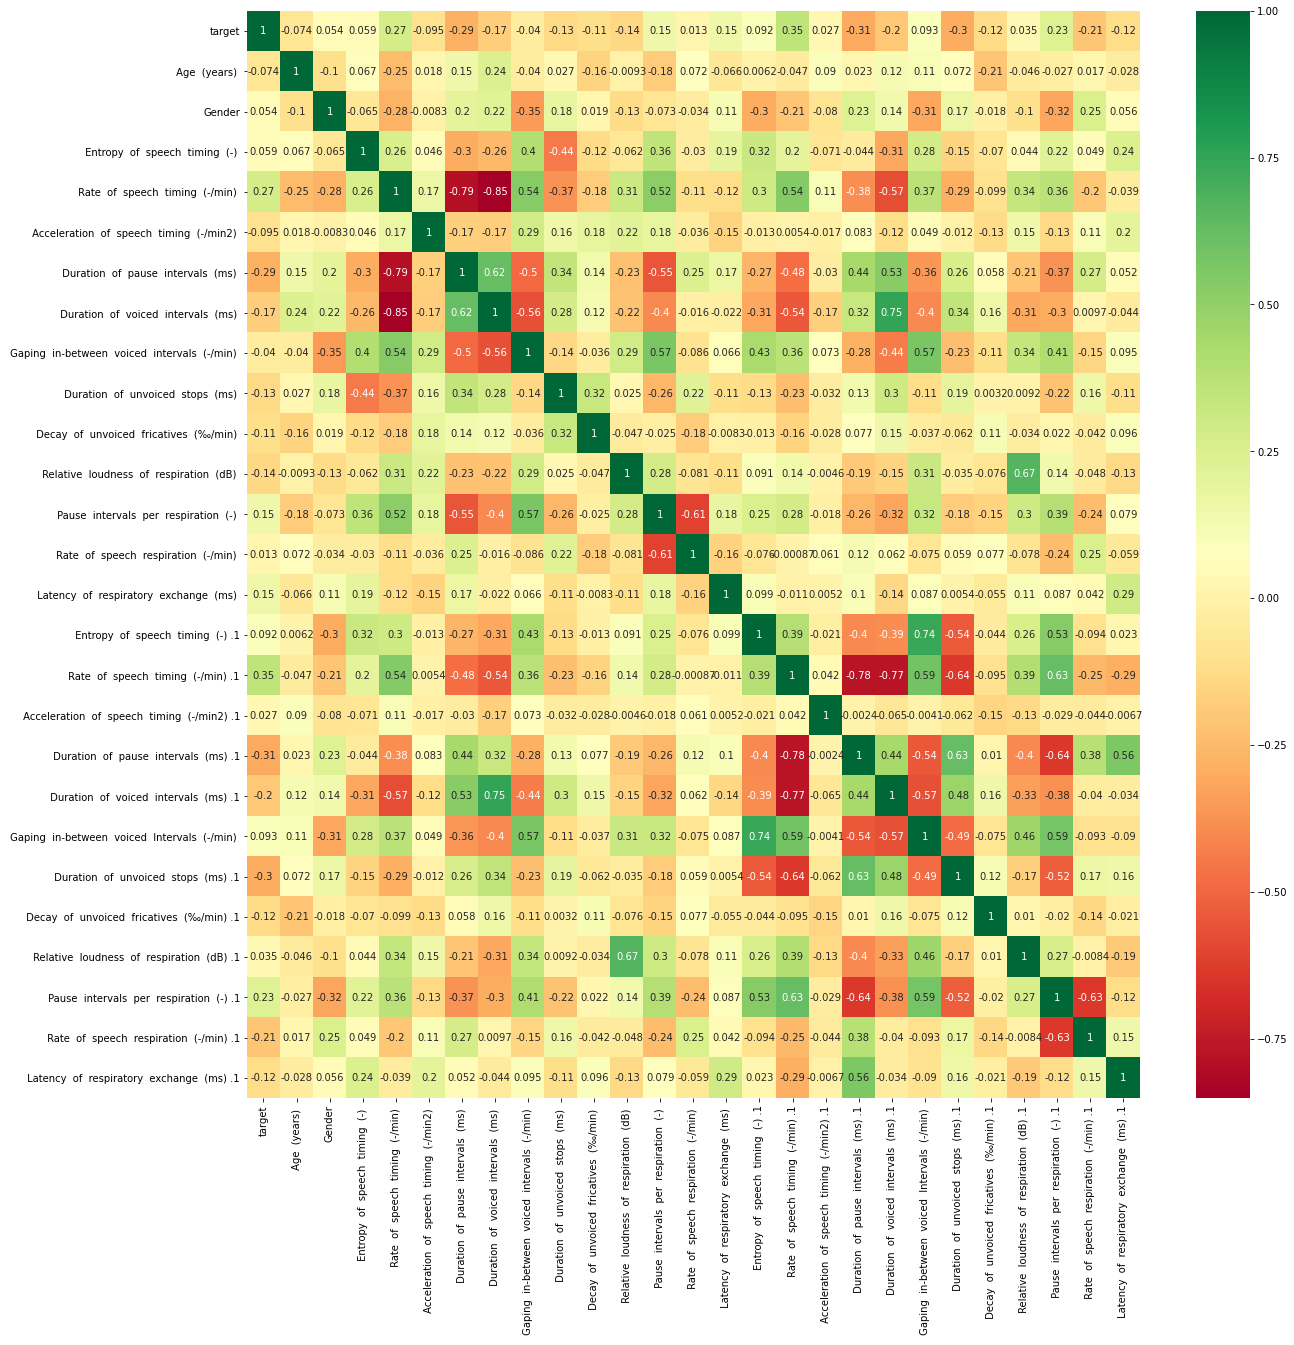

In [ ]:
#Heat map


#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

[0.03575974 0.01774465 0.03079897 0.04547011 0.04657624 0.04232468
 0.05108209 0.04049125 0.03260797 0.03565712 0.04445872 0.02567614
 0.03259485 0.04177991 0.03256838 0.08049129 0.02813377 0.05287888
 0.03442171 0.02898981 0.04182    0.03624932 0.03675974 0.03389608
 0.03295834 0.03781023]


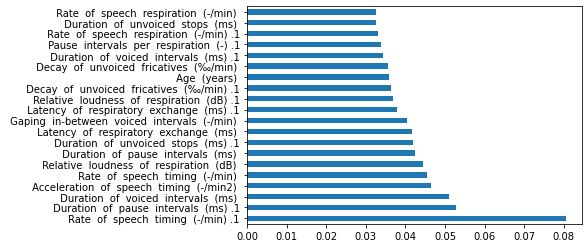

In [ ]:

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
#len(to_drop_feat)
#len(df.columns)
df

,target,Age (years),Gender,Entropy of speech timing (-),Rate of speech timing (-/min),Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Gaping in-between voiced intervals (-/min),Duration of unvoiced stops (ms),Decay of unvoiced fricatives (‰/min),Relative loudness of respiration (dB),Pause intervals per respiration (-),Rate of speech respiration (-/min),Latency of respiratory exchange (ms),Entropy of speech timing (-) .1,Rate of speech timing (-/min) .1,Acceleration of speech timing (-/min2) .1,Duration of pause intervals (ms) .1,Duration of voiced intervals (ms) .1,Gaping in-between voiced Intervals (-/min),Duration of unvoiced stops (ms) .1,Decay of unvoiced fricatives (‰/min) .1,Relative loudness of respiration (dB) .1,Pause intervals per respiration (-) .1,Rate of speech respiration (-/min) .1,Latency of respiratory exchange (ms) .1
0,0.0,0.489796,0.0,0.921875,0.675079,0.414037,0.171233,0.143777,0.469096,0.292715,0.569613,0.518782,0.200000,0.454857,0.364269,0.812500,0.736667,0.462934,0.082996,0.181664,0.577169,0.200000,0.601560,0.408672,0.375000,0.270924,0.193772
1,0.0,0.693878,0.0,0.921875,0.630915,0.751138,0.263699,0.120172,0.360618,0.097572,0.588944,0.381477,0.342857,0.287429,0.354988,0.890625,0.576667,0.801907,0.360324,0.089983,0.435104,0.300222,0.177618,0.219512,0.208333,0.656023,0.515571
2,0.0,0.693878,1.0,0.812500,0.223975,0.506987,0.962329,0.268240,0.353101,0.438855,0.827976,0.880181,0.114286,0.444000,0.839907,0.593750,0.450000,0.694556,0.329960,0.179966,0.576496,0.200000,0.138614,0.759892,0.208333,0.692308,0.321799
3,0.0,0.836735,1.0,0.570312,0.000000,0.279950,0.904110,1.000000,0.000000,0.585429,0.632982,0.319948,0.000000,0.385429,0.252900,0.421875,0.000000,0.270071,0.566802,1.000000,0.067418,0.800000,0.662466,0.120867,0.041667,0.298016,0.235294
4,0.0,0.551020,1.0,0.757812,0.406940,0.424556,0.393836,0.281116,0.304657,0.633998,0.630864,0.509715,0.228571,0.315429,0.157773,0.750000,0.393333,0.911719,0.180162,0.456706,0.317081,0.300000,0.447645,0.270461,0.291667,0.309627,0.235294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1.0,0.714286,1.0,0.921875,0.394322,0.375255,0.349315,0.360515,0.276989,0.195143,0.582048,0.158031,0.314286,0.143429,0.343387,0.656250,0.473333,0.808982,0.297571,0.286927,0.364492,0.300222,0.432043,0.227100,0.125000,0.348331,0.280277
126,1.0,0.693878,1.0,0.789062,0.476341,0.418119,0.297945,0.347639,0.270098,0.292498,0.601325,0.492876,0.228571,0.235429,0.496520,0.890625,0.626667,0.675484,0.121457,0.251273,0.544385,0.200000,0.390039,0.468293,0.291667,0.422351,0.212803
127,1.0,0.387755,1.0,0.734375,0.498423,0.104569,0.277397,0.184549,0.410211,0.707285,0.623371,0.490285,0.200000,0.396857,0.559165,0.390625,0.446667,0.706244,0.214575,0.305603,0.387693,0.600000,0.548455,0.636856,0.125000,0.546686,0.243945
128,1.0,0.204082,1.0,0.890625,0.690852,0.280735,0.250000,0.126609,0.385884,0.000000,0.639010,0.431347,0.314286,0.369143,0.501160,0.765625,0.500000,0.635804,0.273279,0.254669,0.407532,0.300222,0.541854,0.530081,0.208333,0.449927,0.240484


In [ ]:
drop_col=list()
for i in range(26):
    if to_drop_feat[i]==False:
        drop_col.append(df.columns[i+1])

In [ ]:
df.drop(drop_col,1,inplace=True)
df

,target,Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Relative loudness of respiration (dB),Rate of speech timing (-/min) .1,Duration of pause intervals (ms) .1
0,0.0,0.414037,0.171233,0.143777,0.518782,0.736667,0.082996
1,0.0,0.751138,0.263699,0.120172,0.381477,0.576667,0.360324
2,0.0,0.506987,0.962329,0.268240,0.880181,0.450000,0.329960
3,0.0,0.279950,0.904110,1.000000,0.319948,0.000000,0.566802
4,0.0,0.424556,0.393836,0.281116,0.509715,0.393333,0.180162
...,...,...,...,...,...,...,...
125,1.0,0.375255,0.349315,0.360515,0.158031,0.473333,0.297571
126,1.0,0.418119,0.297945,0.347639,0.492876,0.626667,0.121457
127,1.0,0.104569,0.277397,0.184549,0.490285,0.446667,0.214575
128,1.0,0.280735,0.250000,0.126609,0.431347,0.500000,0.273279


# Splitting data in train and test

In [ ]:
from sklearn.model_selection import train_test_split
df_target=pd.DataFrame(df['target'])
df.drop('target',1,inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, np.ravel(df_target), test_size=0.30, random_state=101)

# Running SVM Classifier on dataset

In [ ]:
#X_train=(X_train-X_train.mean())/X_train.std()
X_train

,Acceleration of speech timing (-/min2),Duration of pause intervals (ms),Duration of voiced intervals (ms),Relative loudness of respiration (dB),Rate of speech timing (-/min) .1,Duration of pause intervals (ms) .1
69,0.388130,0.510274,0.150215,0.000000,0.523333,0.275304
3,0.279950,0.904110,1.000000,0.319948,0.000000,0.566802
89,0.415764,0.226027,0.118026,0.308290,0.850000,0.068826
68,0.365206,0.157534,0.289700,0.441062,0.410000,0.364372
67,0.279950,0.321918,0.201717,0.259067,0.300000,0.540486
...,...,...,...,...,...,...
63,0.417177,0.311644,0.229614,0.166451,0.496667,0.289474
70,0.552834,0.366438,0.324034,0.732513,0.926667,0.046559
81,0.564453,0.208904,0.141631,0.128238,0.743333,0.198381
11,0.298948,0.113014,0.137339,0.355570,0.550000,0.196356


In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC(C=100,gamma=1)
model.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
prediction=model.predict(X_test)

# Checking accuracy

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,prediction))

[[18  3]
 [10  8]]


In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.64      0.86      0.73        21
         1.0       0.73      0.44      0.55        18

    accuracy                           0.67        39
   macro avg       0.69      0.65      0.64        39
weighted avg       0.68      0.67      0.65        39



In [ ]:
#note: model parameters are bad(default settings of SVM is not good for this data set)

# Finding right parameters for the model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [80,90,100,110,120,150], 'gamma': [1.5,1.3,1.2,1.1,1,0.9,0.8,0.7,0.6,0.5,0.1], 'kernel': ['rbf']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 66 candidates, totalling 330 fits
[CV] C=80, gamma=1.5, kernel=rbf .....................................
[CV] ......... C=80, gamma=1.5, kernel=rbf, score=0.684, total=   0.0s
[CV] C=80, gamma=1.5, kernel=rbf .....................................
[CV] ......... C=80, gamma=1.5, kernel=rbf, score=0.722, total=   0.0s
[CV] C=80, gamma=1.5, kernel=rbf .....................................
[CV] ......... C=80, gamma=1.5, kernel=rbf, score=0.667, total=   0.0s
[CV] C=80, gamma=1.5, kernel=rbf .....................................
[CV] ......... C=80, gamma=1.5, kernel=rbf, score=0.667, total=   0.0s
[CV] C=80, gamma=1.5, kernel=rbf .....................................
[CV] ......... C=80, gamma=1.5, kernel=rbf, score=0.500, total=   0.0s
[CV] C=80, gamma=1.3, kernel=rbf .....................................
[CV] ......... C=80, gamma=1.3, kernel=rbf, score=0.632, total=   0.0s
[CV] C=80, gamma=1.3, kernel=rbf .....................................
[CV] ......... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=80, gamma=0.5, kernel=rbf, score=0.722, total=   0.0s
[CV] C=80, gamma=0.5, kernel=rbf .....................................
[CV] ......... C=80, gamma=0.5, kernel=rbf, score=0.722, total=   0.0s
[CV] C=80, gamma=0.5, kernel=rbf .....................................
[CV] ......... C=80, gamma=0.5, kernel=rbf, score=0.611, total=   0.0s
[CV] C=80, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=80, gamma=0.1, kernel=rbf, score=0.789, total=   0.0s
[CV] C=80, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=80, gamma=0.1, kernel=rbf, score=0.722, total=   0.0s
[CV] C=80, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=80, gamma=0.1, kernel=rbf, score=0.778, total=   0.0s
[CV] C=80, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=80, gamma=0.1, kernel=rbf, score=0.722, total=   0.0s
[CV] C=80, gamma=0.1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 330 out of 330 | elapsed:    1.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [80, 90, 100, 110, 120, 150],
                         'gamma': [1.5, 1.3, 1.2, 1.1, 1, 0.9, 0.8, 0.7, 0.6,
                                   0.5, 0.1],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predicting with new parameter values

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[19  2]
 [10  8]]


In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.66      0.90      0.76        21
         1.0       0.80      0.44      0.57        18

    accuracy                           0.69        39
   macro avg       0.73      0.67      0.67        39
weighted avg       0.72      0.69      0.67        39



In [ ]:
#for top 20 features: precision=0.54
#for top 15 features: precision=0.64
#for top 12 features: precision=0.59
#for top 10 features: precision=0.69
#for top 9 features: precision=0.64
#for top 8 features: precision=0.72
#for top 7 features: precision=0.64
#for top 5 features with added feature: precision=0.74
#for top 6 features: precision=0.76

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predic_dtree = dtree.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predic_dtree))

[[18  3]
 [10  8]]


In [ ]:
print(classification_report(y_test,predic_dtree))

              precision    recall  f1-score   support

         0.0       0.64      0.86      0.73        21
         1.0       0.73      0.44      0.55        18

    accuracy                           0.67        39
   macro avg       0.69      0.65      0.64        39
weighted avg       0.68      0.67      0.65        39



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[21  0]
 [ 8 10]]


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        21
         1.0       1.00      0.56      0.71        18

    accuracy                           0.79        39
   macro avg       0.86      0.78      0.78        39
weighted avg       0.85      0.79      0.78        39



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 600}

In [ ]:
rfc_new = RandomForestClassifier(n_estimators=1400,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=80,bootstrap=True)
rfc_new.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        21
         1.0       1.00      0.56      0.71        18

    accuracy                           0.79        39
   macro avg       0.86      0.78      0.78        39
weighted avg       0.85      0.79      0.78        39



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred))

[[18  3]
 [ 9  9]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.67      0.86      0.75        21
         1.0       0.75      0.50      0.60        18

    accuracy                           0.69        39
   macro avg       0.71      0.68      0.68        39
weighted avg       0.71      0.69      0.68        39



In [ ]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

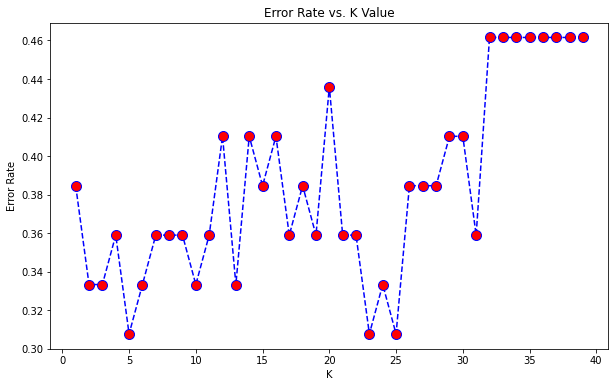

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))

[[18  3]
 [ 9  9]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.67      0.86      0.75        21
         1.0       0.75      0.50      0.60        18

    accuracy                           0.69        39
   macro avg       0.71      0.68      0.68        39
weighted avg       0.71      0.69      0.68        39



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75        21
         1.0       1.00      0.22      0.36        18

    accuracy                           0.64        39
   macro avg       0.80      0.61      0.56        39
weighted avg       0.78      0.64      0.57        39



In [ ]:
param_grid = {'C' : [0.1,1,10,100,1000] , 'tol': [10,1,0.1,0.01,0.001,0.0001,0.000001]}
grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] C=0.1, tol=10 ...................................................
[CV] ....................... C=0.1, tol=10, score=0.632, total=   0.0s
[CV] C=0.1, tol=10 ...................................................
[CV] ....................... C=0.1, tol=10, score=0.667, total=   0.0s
[CV] C=0.1, tol=10 ...................................................
[CV] ....................... C=0.1, tol=10, score=0.667, total=   0.0s
[CV] C=0.1, tol=10 ...................................................
[CV] ....................... C=0.1, tol=10, score=0.667, total=   0.0s
[CV] C=0.1, tol=10 ...................................................
[CV] ....................... C=0.1, tol=10, score=0.611, total=   0.0s
[CV] C=0.1, tol=1 ....................................................
[CV] ........................ C=0.1, tol=1, score=0.632, total=   0.0s
[CV] C=0.1, tol=1 ....................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=1, tol=10, score=0.667, total=   0.0s
[CV] C=1, tol=10 .....................................................
[CV] ......................... C=1, tol=10, score=0.667, total=   0.0s
[CV] C=1, tol=10 .....................................................
[CV] ......................... C=1, tol=10, score=0.611, total=   0.0s
[CV] C=1, tol=1 ......................................................
[CV] .......................... C=1, tol=1, score=0.632, total=   0.0s
[CV] C=1, tol=1 ......................................................
[CV] .......................... C=1, tol=1, score=0.667, total=   0.0s
[CV] C=1, tol=1 ......................................................
[CV] .......................... C=1, tol=1, score=0.667, total=   0.0s
[CV] C=1, tol=1 ......................................................
[CV] .......................... C=1, tol=1, score=0.667, total=   0.0s
[CV] C=1, tol=1 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    1.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'tol': [10, 1, 0.1, 0.01, 0.001, 0.0001, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
grid.best_params_

{'C': 1000, 'tol': 1}

In [ ]:
grid.best_estimator_

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1, verbose=0,
                   warm_start=False)

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.66      0.90      0.76        21
         1.0       0.80      0.44      0.57        18

    accuracy                           0.69        39
   macro avg       0.73      0.67      0.67        39
weighted avg       0.72      0.69      0.67        39

